# Networks

This lesson introduces the network data structure.  Aspects of this lesson are adapted from Andrew Brooks' tutorial on graph optimization.  

https://www.datacamp.com/community/tutorials/networkx-python-graph-tutorial

It also draws from theory material presented at PyCon 2015 by Celia La and Sarah Guido.  

https://github.com/sarguido/networkx-tutorial

You will need to install two packages:

pip install networkx
pip install imageio

The networkx documentation is here: 

https://networkx.github.io/

In [1]:
# imports
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline

# Intro to NetworkX

### Adding & editing graph nodes

We'll first take a look at creating a graph, and adding/editing nodes:

In [2]:
import networkx as nx

'''use g = nx.Graph() to create a graph'''

g = nx.Graph()

'''Lesson: use .add_node(1) to add a single node'''
g.add_node(1)

'''Lesson: use .add_nodes_from([2, 3, 'four', 5])  to add in bulk'''
g.add_nodes_from([2, 3, 'four', 5])

g.nodes()  # run g.nodes() to view the graph

NodeView((1, 2, 3, 'four', 5))

In [3]:
'''Note that NetworkX won't complain if we re-add pre-existing nodes'''

# TODO: try re-adding nodes to see what happens

g.nodes()  # display nodes

NodeView((1, 2, 3, 'four', 5))

In [4]:
'''Lesson: remove syntax is similar to adding, eg:
        .remove_node()
        .remove_nodes_from()
'''

# TODO: try removing both 1) single nodes, 2) nodes in bulk

#g.remove_node(1) removes a single node

#g.remove_nodes_from([2,5]) #removes multiple nodes from a list


g.nodes()  # display nodes

NodeView((1, 2, 3, 'four', 5))

### Adding & editing edges

In [5]:
h = nx.Graph()  # let's create a 2nd graph to play with edges

'''Lesson: to create an edge, just specify the 2 nodes that define it: 
        .add_edge('a','b')
    Note that those nodes also get added (no need to make them beforehand!)
'''

h.add_edge('a', 'b')


print('edges:', h.edges())  # see your new edge
print('nodes:', h.nodes())  # verify that new nodes were also added

edges: [('a', 'b')]
nodes: ['a', 'b']


### Visualizing graphs

C:\Users\Zimmerman1\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


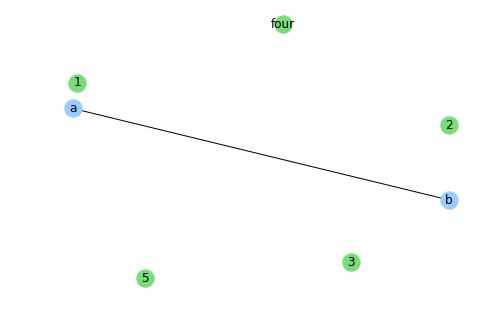

In [6]:

GREEN = "#77DD77"
BLUE = "#99CCFF"

nx.draw(g, node_color=GREEN, with_labels=True)
nx.draw(h, node_color=BLUE, with_labels=True)



#### How would you create the following graph?

<img src="img/graph.png" style="float:left" width="200" />

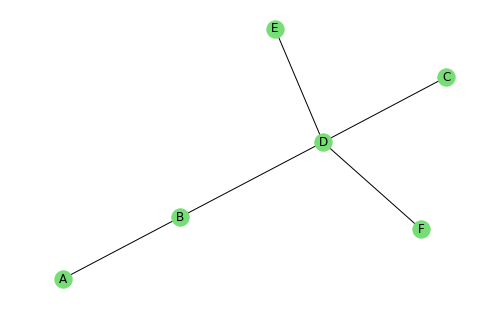

In [7]:
g = nx.Graph()

g.add_edges_from([('A','B'),('B','D'),('C','D'),('E','D'),('F','D')])

nx.draw(g, node_color=GREEN, with_labels=True)

# Directed graphs

directed edges: [(1, 2), (2, 3)]


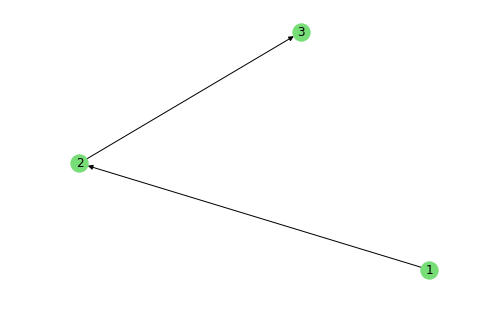

In [8]:
'''Lesson: use nx.DiGraph() to create a new directed graph
'''

dg = nx.DiGraph()


dg.add_edges_from([(1,2), (2,3)])

print('directed edges:', dg.edges())
nx.draw(dg, node_color=GREEN, with_labels=True)


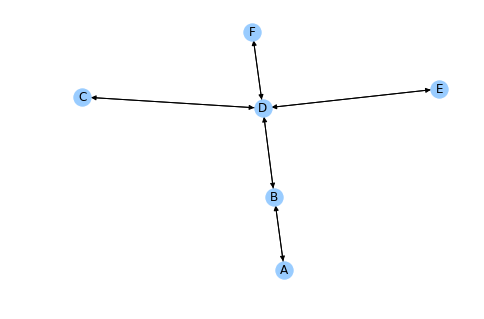

In [9]:
'''We can make directed graphs from existing graphs, eg:
        nx.DiGraph(g)
'''

dg = nx.DiGraph(g)


nx.draw(dg, node_color=BLUE, with_labels=True)

In [10]:
''' Notice that nodes A and B have TWO directed edges:
        A -> B
        B -> A
'''

dg.edges()

OutEdgeView([('A', 'B'), ('B', 'A'), ('B', 'D'), ('D', 'B'), ('D', 'C'), ('D', 'E'), ('D', 'F'), ('C', 'D'), ('E', 'D'), ('F', 'D')])

### Adding attributes to nodes and edges

Sometimes you may want to attach attributes to either the nodes or edges:

* Perhaps you want to save node properties that will be helpful with future analysis
* Perhaps you want to attach visual descriptions, such a node size, edge width or graph color

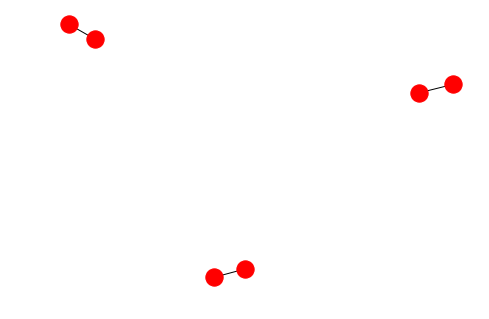

In [11]:
cities = nx.Graph()

cities.add_edge('San Diego', 'Los Angeles', attr_dict = { 'distance': 0.4})
cities.add_edge('New York', 'Nashville', attr_dict = { 'distance': 5.6})
cities.add_edge('Boston', 'D.C.', attr_dict = { 'distance': 0.8})

nx.draw(cities)

# Describing a network

### Degree Distribution:



<img src="img/graph.png" style="float:left; padding-right:20px;" width="200" />

- 1 node with 4 edges
- 1 node with 2 edges
- 4 nodes with 1 edge

Distribution:

    [(1:4), (1:2), (4:1)]


In [12]:
# Degree Distribution for all nodes
print('Degree Distribution:', g.degree())

Degree Distribution: [('A', 1), ('B', 2), ('D', 4), ('C', 1), ('E', 1), ('F', 1)]


In [13]:
# Generate the graph above
paths = nx.Graph()
paths.add_edges_from([
    ('A','B'), ('B','D'), ('B','C'), ('D','E'), ('D','C'),
    ('C','1'), ('1','2'), ('1','3'), ('2','3'), 
    ('E','2'), ('E','4')])

# Display average shortest path details
print('Avg shortest path from A to E is', nx.shortest_path_length(paths, 'A','E'), 'hops:')
print(nx.shortest_path(paths, 'A','E'))

Avg shortest path from A to E is 3 hops:
['A', 'B', 'D', 'E']


## Network Centrality (the higher result is better!)

* **Degree: number of edges** for node X
* **Betweenness: number of shortest paths** that pass through node X
* **Closeness: average of the shortest paths** between X and all other nodes

<img src="img/centrality1.png" style="float:left;" width="400" />
<img src="img/centrality2.png" style="float:left;" width="200" />



In [14]:
''' To calculate Degree Distribution for all nodes, use:
    g.degree()  for non-normalized values,
    nx.degree_centrality(g)   for normalized values
'''

# degree distrib., non-normalized
print('Degree Centrality:')
print(g.degree())

# TODO degree distrib., normalized
print('\nDegree Centrality, Normalized:')
print(nx.degree_centrality(g))


Degree Centrality:
[('A', 1), ('B', 2), ('D', 4), ('C', 1), ('E', 1), ('F', 1)]

Degree Centrality, Normalized:
{'A': 0.2, 'B': 0.4, 'D': 0.8, 'C': 0.2, 'E': 0.2, 'F': 0.2}


In [45]:
''' To calculate betweenness centrality, use:
    nx.betweenness_centrality(g, normalized=True/False)   default is True
'''

# betweenness centrality, non-normalized
print('Betweenness Centrality:')
print(nx.betweenness_centrality(g, normalized=False))

# betweenness centrality, normalized
print('\nBetweenness Centrality, Normalized:')
print(nx.betweenness_centrality(g, normalized=True))


Betweenness Centrality:
{'A': 0.0, 'B': 4.0, 'D': 9.0, 'C': 0.0, 'E': 0.0, 'F': 0.0}

Betweenness Centrality, Normalized:
{'A': 0.0, 'B': 0.4, 'D': 0.9, 'C': 0.0, 'E': 0.0, 'F': 0.0}


In [15]:
''' to calculate closeness centrality, use:
    nx.closeness_centrality(g)
'''

# find closeness centrality
print('Closeness Centrality:')
print(nx.closeness_centrality(g))

Closeness Centrality:
{'A': 0.4166666666666667, 'B': 0.625, 'D': 0.8333333333333334, 'C': 0.5, 'E': 0.5, 'F': 0.5}


# Back to Airline Networks

Previously we used open flights to examine airline routes around the world.  We found that it was a bit of a pain to store the data in tables, and merge different information.  We can model it as network instead.  I've cleaned the data up a bit, and selected out only the routes operated by Delta, making it a bit more managable.  


In [16]:
# read the data
routes = pd.read_csv('data/delta_routes.csv')
routes.head()

,Unnamed: 0,airline,airline_id,source,source_id,dest,dest_id,codeshare,stops,equipment,latitude_source,longitude_source,latitude_dest,longitude_dest
0,0,DL,2009.0,ABE,4355.0,ATL,3682.0,NaN,0,717,40.652100,-75.440804,33.636700,-84.428101
1,1,DL,2009.0,ABQ,4019.0,ATL,3682.0,NaN,0,757 320,35.040199,-106.609001,33.636700,-84.428101
2,2,DL,2009.0,ABQ,4019.0,MSP,3858.0,NaN,0,320,35.040199,-106.609001,44.882000,-93.221802
3,3,DL,2009.0,ACC,248.0,JFK,3797.0,NaN,0,76W,5.605190,-0.166786,40.639801,-73.778900
4,4,DL,2009.0,ACC,248.0,ROB,1063.0,NaN,0,76W,5.605190,-0.166786,6.233790,-10.362300


### As a review, let's build an interactive map to see what this looks like



In [18]:
import pyproj
import folium

In [19]:

# when creating a function, it is good practice to define the API!
def getGreatCirclePoints(startlat, startlon, endlat, endlon): 
    """
    startlat - starting latitude 
    startlon - starting longitude 
    endlat   - ending latitude 
    endlon   - ending longitude 
    
    returns - a list of tuples, where each tuple is the lat-long for a point
              along the curve.  
    """
    # calculate distance between points
    g = pyproj.Geod(ellps='WGS84')
    (az12, az21, dist) = g.inv(startlon, startlat, endlon, endlat)

    # calculate line string along path with segments <= 20 km
    lonlats = g.npts(startlon, startlat, endlon, endlat,
                     1 + int(dist / 20000))

    # the npts function uses lon-lat, while the folium functions use lat-lon
    # This sort of thing is maddening!  What happens is the lines don't show
    # up on the map and you don't know why.  Learn from my mistakes
    latlons = []
    for lon_lat in lonlats: 
        
        # this is how you get values out of a tuple
        (lon, lat) = lon_lat
        
        # add them to our list
        latlons.append((lat, lon)) 
    
    # npts doesn't include start/end points, so prepend/append them
    latlons.insert(0, (startlat, startlon))
    latlons.append((endlat, endlon))
    
    return latlons


In [20]:
# create a basic map, centered on Lexington
m = folium.Map(
    location=[38.034,-84.500],
    tiles='Stamen Toner',
    zoom_start=4
)

In [21]:
# define the map in the same way, but use great circles for the lines

# Define some empty sets
airport_set = set()
route_set = set()

# Make sure we don't add duplicates, especially for the origins
for name, row in routes.iterrows():
    
    if row['source'] not in airport_set: 
        popup_string = row['source']
        marker = folium.CircleMarker([row["latitude_source"], row["longitude_source"]], 
                                     color='DarkCyan',
                                     fill_color='DarkCyan', 
                                     radius=5, popup=popup_string)
        marker.add_to(m)
        airport_set.add(row['source'])
        
    if row['dest'] not in airport_set: 
        popup_string = row['dest']
        marker = folium.CircleMarker([row["latitude_dest"], row["longitude_dest"]], 
                                     color='MidnightBlue',
                                     fill_color='MidnightBlue', 
                                     radius=5, popup=popup_string)
        marker.add_to(m)
        airport_set.add(row['dest'])
    
    # PolyLine will accept a whole list of tuples, not just two
    if (row['source'],row['dest']) not in route_set:            
        popup_string = row['source'] + '-' + row['dest']       
        
        gc_points = getGreatCirclePoints(row["latitude_source"], 
                                         row["longitude_source"], 
                                         row["latitude_dest"], 
                                         row["longitude_dest"])
        
        line = folium.PolyLine(gc_points, weight=2, popup=popup_string)
        line.add_to(m)
        route_set.add((row['source'],row['dest']))
        

In [22]:
# save it to its own file
m.save("delta.html")

# Homework

1. Represent the Delta flights as a network.  What are the nodes?  What are the links?
2. Which is the most important airport in Delta's network?  Support your answer using appropriate network metrics.  
3. How many flights are needed to reach Honolulu?  
4. What is the maximum number of flights needed to reach any destination in Delta's network?
5. Convert the network into a weighted network, using the travel time as the weight.  Assume that planes fly at 500 mph, plus 30 minutes to take off + 30 minutes to land.  
6. How long does it take to travel to Honolulu, in flight times.  

In [ ]:
#1. Represent the Delta flights as a network. What are the nodes? What are the links?

In [23]:
delta = nx.Graph()

In [24]:
delta.add_nodes_from(routes['source'])

In [25]:
delta.nodes

NodeView(('ABE', 'ABQ', 'ACC', 'AGS', 'ALB', 'AMS', 'ANC', 'ATL', 'AUA', 'AUS', 'AVL', 'AZO', 'BCN', 'BDA', 'BDL', 'BGR', 'BHM', 'BIL', 'BKK', 'BNA', 'BOG', 'BOI', 'BOM', 'BON', 'BOS', 'BRU', 'BSB', 'BTR', 'BTV', 'BUF', 'BWI', 'BZE', 'BZN', 'CAE', 'CAK', 'CCS', 'CDG', 'CHA', 'CHS', 'CLE', 'CLT', 'CMH', 'COS', 'CRW', 'CUL', 'CUN', 'CVG', 'CZM', 'DAB', 'DAL', 'DAY', 'DCA', 'DEN', 'DFW', 'DKR', 'DSM', 'DTW', 'DUB', 'DUS', 'DXB', 'ECP', 'EKO', 'ELP', 'ERI', 'EWR', 'EYW', 'EZE', 'FAR', 'FAY', 'FCO', 'FLL', 'FNT', 'FPO', 'FRA', 'FSD', 'FUK', 'GCM', 'GDL', 'GEG', 'GIG', 'GND', 'GNV', 'GPT', 'GRB', 'GRR', 'GRU', 'GSO', 'GSP', 'GUA', 'GUM', 'HKG', 'HMO', 'HND', 'HNL', 'HOU', 'HSV', 'IAD', 'IAH', 'ICN', 'ICT', 'ILM', 'IND', 'JAN', 'JAX', 'JFK', 'JNB', 'KIN', 'KIX', 'KOA', 'LAS', 'LAX', 'LEX', 'LGA', 'LHR', 'LIH', 'LIM', 'LIR', 'LIT', 'LOS', 'MAD', 'MAN', 'MBJ', 'MCI', 'MCO', 'MDT', 'MDW', 'MEM', 'MEX', 'MGA', 'MHT', 'MIA', 'MID', 'MKE', 'MLB', 'MNL', 'MOB', 'MSN', 'MSO', 'MSP', 'MSY', 'MTY', 'MU

In [26]:
delta.add_nodes_from(routes['dest'])

In [27]:
delta.nodes

NodeView(('ABE', 'ABQ', 'ACC', 'AGS', 'ALB', 'AMS', 'ANC', 'ATL', 'AUA', 'AUS', 'AVL', 'AZO', 'BCN', 'BDA', 'BDL', 'BGR', 'BHM', 'BIL', 'BKK', 'BNA', 'BOG', 'BOI', 'BOM', 'BON', 'BOS', 'BRU', 'BSB', 'BTR', 'BTV', 'BUF', 'BWI', 'BZE', 'BZN', 'CAE', 'CAK', 'CCS', 'CDG', 'CHA', 'CHS', 'CLE', 'CLT', 'CMH', 'COS', 'CRW', 'CUL', 'CUN', 'CVG', 'CZM', 'DAB', 'DAL', 'DAY', 'DCA', 'DEN', 'DFW', 'DKR', 'DSM', 'DTW', 'DUB', 'DUS', 'DXB', 'ECP', 'EKO', 'ELP', 'ERI', 'EWR', 'EYW', 'EZE', 'FAR', 'FAY', 'FCO', 'FLL', 'FNT', 'FPO', 'FRA', 'FSD', 'FUK', 'GCM', 'GDL', 'GEG', 'GIG', 'GND', 'GNV', 'GPT', 'GRB', 'GRR', 'GRU', 'GSO', 'GSP', 'GUA', 'GUM', 'HKG', 'HMO', 'HND', 'HNL', 'HOU', 'HSV', 'IAD', 'IAH', 'ICN', 'ICT', 'ILM', 'IND', 'JAN', 'JAX', 'JFK', 'JNB', 'KIN', 'KIX', 'KOA', 'LAS', 'LAX', 'LEX', 'LGA', 'LHR', 'LIH', 'LIM', 'LIR', 'LIT', 'LOS', 'MAD', 'MAN', 'MBJ', 'MCI', 'MCO', 'MDT', 'MDW', 'MEM', 'MEX', 'MGA', 'MHT', 'MIA', 'MID', 'MKE', 'MLB', 'MNL', 'MOB', 'MSN', 'MSO', 'MSP', 'MSY', 'MTY', 'MU

C:\Users\Zimmerman1\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


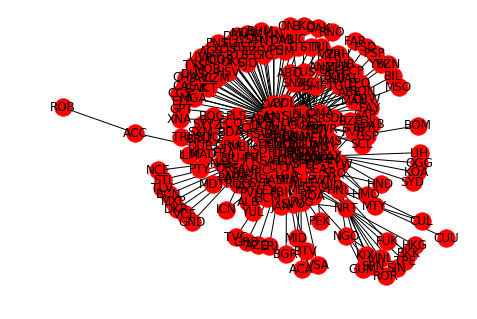

In [28]:
delta = nx.from_pandas_edgelist(routes, 'source', 'dest')
nx.draw(delta, with_labels=True)

In [34]:
#The nodes are the airports and the links are the flights

In [35]:
#2. Which is the most important airport in Delta's network? 
#Support your answer using appropriate network metrics. 

In [42]:
degree_cent = nx.degree_centrality(delta)
df = pd.Series(degree_cent)
df.sort_values(axis=0, ascending=False)

ATL    0.742358
JFK    0.366812
DTW    0.353712
MSP    0.275109
SLC    0.187773
LGA    0.165939
LAX    0.157205
CVG    0.109170
NRT    0.074236
MEX    0.074236
BOS    0.074236
MCO    0.061135
SEA    0.061135
CDG    0.061135
LAS    0.056769
RDU    0.052402
CUN    0.048035
MIA    0.043668
IND    0.043668
PIT    0.039301
MEM    0.039301
SFO    0.039301
ORD    0.039301
AMS    0.039301
HNL    0.039301
PDX    0.030568
PHL    0.030568
CMH    0.030568
DFW    0.030568
BWI    0.030568
         ...   
MDT    0.004367
MAN    0.004367
LOS    0.004367
LIT    0.004367
LIM    0.004367
KIN    0.004367
JNB    0.004367
JAN    0.004367
ILM    0.004367
ICT    0.004367
MYR    0.004367
PNS    0.004367
XNA    0.004367
PTY    0.004367
VPS    0.004367
UVF    0.004367
UIO    0.004367
TYS    0.004367
TUL    0.004367
TRI    0.004367
TLH    0.004367
TGU    0.004367
STR    0.004367
SJD    0.004367
SCL    0.004367
SAP    0.004367
SAL    0.004367
RTB    0.004367
ROA    0.004367
ABE    0.004367
Length: 230, dtype: floa

In [43]:
between_cent = nx.betweenness_centrality(delta, normalized=True)
df2 = pd.Series(between_cent)
df2.sort_values(axis=0, ascending=False)

ATL    0.653985
JFK    0.151990
DTW    0.118757
MSP    0.098433
NRT    0.067465
LAX    0.057727
SLC    0.053362
LGA    0.028575
MEX    0.025128
HNL    0.019466
MTY    0.013409
AMS    0.008849
SEA    0.008814
ACC    0.008734
LAS    0.006744
MIA    0.006554
HMO    0.004050
PHX    0.003265
CVG    0.002818
NGO    0.002779
SFO    0.001699
BOS    0.001528
MCO    0.000991
IAD    0.000961
ORD    0.000940
CDG    0.000680
IND    0.000656
GUM    0.000411
DFW    0.000358
PDX    0.000357
         ...   
MKE    0.000000
MHT    0.000000
MGA    0.000000
MDW    0.000000
MDT    0.000000
PVR    0.000000
PWM    0.000000
ROA    0.000000
SNA    0.000000
TUS    0.000000
TUL    0.000000
TRI    0.000000
TLH    0.000000
TGU    0.000000
SXM    0.000000
STT    0.000000
STR    0.000000
SRQ    0.000000
SMF    0.000000
RTB    0.000000
SJU    0.000000
SJO    0.000000
SJD    0.000000
SJC    0.000000
SDQ    0.000000
SCL    0.000000
SAP    0.000000
SAN    0.000000
SAL    0.000000
ABE    0.000000
Length: 230, dtype: floa

In [44]:
close_cent = nx.closeness_centrality(delta)
df3 = pd.Series(close_cent)
df3.sort_values(axis=0, ascending = False)

ATL    0.786942
DTW    0.602632
JFK    0.602632
MSP    0.569652
LAX    0.536300
SLC    0.530093
SEA    0.506637
NRT    0.504405
LGA    0.502193
CVG    0.501094
MCO    0.500000
BOS    0.498911
LAS    0.498911
RDU    0.494600
CDG    0.494600
IND    0.492473
CUN    0.491416
MIA    0.491416
PDX    0.490364
SFO    0.489316
DFW    0.487234
MEX    0.487234
CMH    0.485169
TPA    0.485169
STL    0.483122
ORD    0.483122
CLT    0.482105
PHX    0.482105
DEN    0.482105
PIT    0.481092
         ...   
BZN    0.363492
HMO    0.358372
HND    0.352851
SYD    0.349618
OGG    0.349618
LIH    0.349618
KOA    0.349618
EKO    0.346970
ONT    0.346970
OAK    0.346970
RNO    0.346970
GUM    0.337758
MNL    0.336765
SPN    0.336765
MID    0.336270
HKG    0.335777
BKK    0.335777
TPE    0.335777
ROR    0.335777
SIN    0.335777
BGR    0.334795
BTV    0.334795
VSA    0.328080
ACA    0.328080
BOM    0.325284
KIX    0.322990
FUK    0.322082
CUL    0.283767
CUU    0.275904
ROB    0.274580
Length: 230, dtype: floa

In [ ]:
# With ATL being the top airport for Degree Centrality, Clonseness, and betweeness it is the most important

In [ ]:
#3. How many flights are needed to reach Honolulu? 

In [45]:
nx.shortest_path(delta, 'LEX', 'HNL')

['LEX', 'ATL', 'HNL']

In [ ]:
#4. What is the maximum number of flights needed to reach any destination in Delta's network?

In [46]:
max_flights = nx.shortest_path_length(delta, source = 'ATL')
max_flights

{'ATL': 0,
 'ABE': 1,
 'ABQ': 1,
 'AGS': 1,
 'ALB': 1,
 'AMS': 1,
 'AUA': 1,
 'AUS': 1,
 'AVL': 1,
 'BDA': 1,
 'BDL': 1,
 'BHM': 1,
 'BNA': 1,
 'BOG': 1,
 'BON': 1,
 'BOS': 1,
 'BRU': 1,
 'BSB': 1,
 'BTR': 1,
 'BUF': 1,
 'BWI': 1,
 'BZE': 1,
 'CAE': 1,
 'CAK': 1,
 'CCS': 1,
 'CDG': 1,
 'CHA': 1,
 'CHS': 1,
 'CLE': 1,
 'CLT': 1,
 'CMH': 1,
 'COS': 1,
 'CRW': 1,
 'CUN': 1,
 'CVG': 1,
 'CZM': 1,
 'DAB': 1,
 'DAY': 1,
 'DCA': 1,
 'DEN': 1,
 'DFW': 1,
 'DSM': 1,
 'DTW': 1,
 'DUB': 1,
 'DUS': 1,
 'DXB': 1,
 'ECP': 1,
 'ELP': 1,
 'EWR': 1,
 'EYW': 1,
 'EZE': 1,
 'FAY': 1,
 'FCO': 1,
 'FLL': 1,
 'FNT': 1,
 'FPO': 1,
 'FRA': 1,
 'GCM': 1,
 'GDL': 1,
 'GIG': 1,
 'GNV': 1,
 'GPT': 1,
 'GRR': 1,
 'GRU': 1,
 'GSO': 1,
 'GSP': 1,
 'GUA': 1,
 'HNL': 1,
 'HOU': 1,
 'HSV': 1,
 'IAD': 1,
 'IAH': 1,
 'ICT': 1,
 'ILM': 1,
 'IND': 1,
 'JAN': 1,
 'JAX': 1,
 'JFK': 1,
 'JNB': 1,
 'KIN': 1,
 'LAS': 1,
 'LAX': 1,
 'LEX': 1,
 'LGA': 1,
 'LHR': 1,
 'LIM': 1,
 'LIR': 1,
 'LIT': 1,
 'LOS': 1,
 'MAD': 1,
 'MAN': 1,

In [ ]:
#From ATL the max flights is 3 to 3 different airports

In [ ]:
#5. Convert the network into a weighted network, using the travel time as the weight.
#Assume that planes fly at 500 mph, plus 30 minutes to take off + 30 minutes to land

In [ ]:
from geopy.distance import great_circle
airport_set = set()
route_set = set()
def distance(start_lat, start_long, end_lat, end_long)


In [ ]:
#6. How long does it take to travel to Honolulu, in flight times. 